# Pima Indians Diabetes Dataset Analysis

## I 320D: Data Science for Biomedical Informatics | Spring 2026

### 📋 Assignment Version A

## About the Dataset

**Dataset:** Pima Indians Diabetes Database  
**Source:** Originally from the National Institute of Diabetes and Digestive and Kidney Diseases  
**File:** `diabetes.csv`  
**Target Variable:** `Outcome` (whether the patient has diabetes: 1 = Yes, 0 = No)

### Clinical Context

Diabetes affects over 37 million Americans and is the 8th leading cause of death in the United States. Type 2 diabetes, which accounts for 90-95% of all diabetes cases, can often be prevented or delayed with lifestyle changes when risk factors are identified early.

This dataset contains diagnostic measurements from female patients of Pima Indian heritage, all at least 21 years old. The Pima Indians have one of the highest rates of diabetes in the world, making this population particularly important for understanding diabetes risk factors. Understanding these variables is crucial for:

- Early identification of high-risk patients
- Preventive care planning
- Resource allocation in healthcare settings
- Clinical decision support systems

## Getting Started

Load the dataset and import libraries:

In [46]:
# Import libraries
!pip install pandas
!pip install numpy

import pandas as pd
import numpy as np

# Display settings for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")
print(f"pandas version: {pd.__version__}")
print(f"numpy version: {np.__version__}")


[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip
Libraries imported successfully!
pandas version: 2.3.3
numpy version: 2.4.1


In [47]:
# Load the dataset
df = pd.read_csv("diabetes.csv")
print("Dataset loaded successfully!")

# Display first few rows to confirm it loaded
df.head()

Dataset loaded successfully!


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


---

# Part 1: The 10-Point Data Inspection

## Point 1: Shape

**Question:** How big is our dataset?

In [48]:
# Point 1: Shape
print("Dataset Shape:")
print(df.shape)

print(f"\n📊 We have {df.shape[0]:,} observations and {df.shape[1]} features")
print(f"📊 Total data points: {df.shape[0] * df.shape[1]:,}")

Dataset Shape:
(768, 9)

📊 We have 768 observations and 9 features
📊 Total data points: 6,912


- How many rows (observations)? 768
- How many columns (features)? 9
- What does each row represent in clinical terms? Each row represents the medical data for one female patient of Pima Indian heritage, aged 21 or older, containing various diagnostic measurements and her diabetes outcome.

---

## Point 2: Column Names

**Question:** What features do we have?


In [49]:
# Point 2: Column Names
print("Column Names:")
print(df.columns.tolist())

print(f"\n📋 Total columns: {len(df.columns)}")

Column Names:
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

📋 Total columns: 9


- List all column names: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome
- Which columns might need further research to understand?
  - The columns Glucose, SkinThickness, Insulin, and DiabetesPedigreeFunction might need further research to understand. For Glucose, we should investigate which values indicate normal vs. abnormal levels and understand why it is a key indicator of diabetes. For SkinThickness, we should understand what skinfold thickness measures physiologically and how it might relate to diabetes risk. For Insulin, we should be aware of what physiological process a 2hr serum insulin test reflects and how it is used clinically. We should research what a Diabetes Pedigree Function is, how it is calculated, and what it represents. 

---
## Point 3: Data Types

**Question:** How is each column stored?

In [50]:
# Point 3: Data Types
print("Data Types:")
print(df.dtypes)

print("\n" + "="*50)
print("Data Type Summary:")
print(df.dtypes.value_counts())

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Data Type Summary:
int64      7
float64    2
Name: count, dtype: int64


- Which columns are numeric? Every column is numeric: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome.

- Which columns are categorical (object/string)? None of the columns is categorical.

- Are there any data types that seem incorrect? Outcome should be treated as a categorical variable instead of int64 because it represents class labels (diabetes vs. no diabetes). Additionally, 

---

## Point 4: First Look (Head)

**Question:** What do the first few rows look like?

In [51]:
# Point 4: First Look
print("First 5 Rows:")
df.head()

First 5 Rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- What do the actual values look like?
    - The values in the dataset are numeric and represent medical and demographic measurements. Some columns contain whole number counts (pregnancies and age), while others contain clinical measurements like glucose level, blood pressure, insulin, and BMI. BMI and Diabetes Pedigree Function include decimal values. The Outcome column contains only zeros and ones, representing whether the patient has diabetes or not. 

- Do you notice anything unusual or unexpected?
    - Yes, some values in the SkinThickness and Insulin columns are recorded as 0, which is unusual because these measure biological measurements that are unlikely to be exactly zero. A skinfold thickness of 0 mm is considered physiologically impossible, and an insulin level of 0 (mu U/ml) would occur in extreme conditions like total pancreatic failure in Type 1 diabetes.

- Are there any values that look like they might be placeholders for missing data?
    - Yes, the zeros in SkinThickness and Insulin columns likely represent missing measurements rather than true values. While a true insulin value of 0 could indicate several medical conditions, it is unlikely that many individuals in the dataset would have such extreme cases. Therefore, these zeros are more reasonably interpreted as placeholders for missing data.

---

## Point 5: Last Look (Tail)

**Question:** What do the last few rows look like?

In [52]:
# Point 5: Last Look
print("Last 5 Rows:")
df.tail()

Last 5 Rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


- Does the data end cleanly?
    - Yes, the dataset appears to end cleanly. The last rows contain the same columns as the rest of the dataset, in which the numeric values are properly formatted for each variable. There are no discrepancies in the columns or obvious formatting issues. 

- Are the last rows consistent with the first rows?
    - Yes, the last rows are consistent with the first rows, considering the structure and type of values. The same variables are present, and the values fall within similar ranges as the first rows. For example, glucose levels are around 90-180, and BMI is generally in the 20s-30s. The Outcome column still only contains zeros and ones. The last rows also contain zeros in SkinThickness and Insulin, which are likely placeholders for missing values. 

---

## Point 6: Memory Usage

**Question:** How much memory does our dataset use?

In [53]:
# Point 6: Memory Usage
print("Memory Usage by Column:")
print(df.memory_usage(deep=True))

# Total memory in MB
total_memory_mb = df.memory_usage(deep=True).sum() / 1e6
print(f"\n💾 Total Memory Usage: {total_memory_mb:.2f} MB")

Memory Usage by Column:
Index                        132
Pregnancies                 6144
Glucose                     6144
BloodPressure               6144
SkinThickness               6144
Insulin                     6144
BMI                         6144
DiabetesPedigreeFunction    6144
Age                         6144
Outcome                     6144
dtype: int64

💾 Total Memory Usage: 0.06 MB


- How much memory does the dataset use? 0.06 MB
- Is this a "small" or "large" dataset by data science standards? A small dataset by data science standards contains usually less than 10,000 points and generally a few megabytes in size.
    - Sources:
        - https://pmc.ncbi.nlm.nih.gov/articles/PMC5072699/#:~:text=The%20required%20strategy%20will%20differ,and%20preparation%20(Rule%2010).
        - https://www.innovatiana.com/en/post/small-datasets-how-to

---

## Point 7: Missing Values

**Question:** Do we have any missing data?

In [54]:
# Point 7: Missing Values
#Missing Values According to .isnull()
missing_counts = df.isnull().sum()
print("Missing Values by Column (explicit NaN values):")
print(missing_counts)

print("\n" + "="*50)

# What percentage of each column is missing?
percent_missing = (df.isnull().mean() * 100).round(2)
print("Percentage of Missing Values by Column:")
print(percent_missing.map(lambda x: f"{x:.2f}%"))

# Summary
total_missing = missing_counts.sum()
print("\nTotal Missing Values in Dataset:", total_missing)

if total_missing == 0:
    print("✅ According to .isnull(), there are no missing values in this dataset.")
else:
    print(f"⚠️ There are {total_missing} missing values that need attention.")

Missing Values by Column (explicit NaN values):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Percentage of Missing Values by Column:
Pregnancies                 0.00%
Glucose                     0.00%
BloodPressure               0.00%
SkinThickness               0.00%
Insulin                     0.00%
BMI                         0.00%
DiabetesPedigreeFunction    0.00%
Age                         0.00%
Outcome                     0.00%
dtype: object

Total Missing Values in Dataset: 0
✅ According to .isnull(), there are no missing values in this dataset.


- Which columns have missing values (according to `.isnull()`)? According to `.isnull()`, there are no missing values in this dataset. 

- What percentage of each column is missing? According to `.isnull()`, 0% of each column is missing in this dataset. 

---

## Point 8: Duplicate Rows

**Question:** Do we have any duplicate records?

In [55]:
# Point 8: Duplicates
duplicate_count = df.duplicated().sum()
duplicate_pct = (duplicate_count / len(df)) * 100

print(f"📑 Duplicate Rows: {duplicate_count:,}")
print(f"📑 Percentage: {duplicate_pct:.2f}%")

if duplicate_count > 0:
    print(f"\n⚠️ Warning: {duplicate_pct:.2f}% of rows are duplicates!")
    print("   This needs investigation in Week 4 (Data Cleaning)")

📑 Duplicate Rows: 0
📑 Percentage: 0.00%


In [56]:
# Let's look at some duplicate examples
print("Example of duplicate rows:")
duplicates = df[df.duplicated(keep=False)]
duplicates.head(10)

Example of duplicate rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


- Are there any duplicate rows? There are no duplicate rows in this dataset. 
- If there are duplicates, how many? N/A

---

## Point 9: Descriptive Statistics

**Question:** What are the statistical properties of our numeric columns?

In [57]:
# Descriptive Statistics for Original Data
print("Descriptive Statistics for Original Data:")
df.describe().T

Descriptive Statistics for Original Data:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [58]:
# Descriptive Statistics for Cleaned Dataset (after converting 0 → NaN)
print("Descriptive Statistics Treating Impossible Zeros as Missing:")
df_clean = df.copy()

cols_with_fake_missing = [
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "Age"
]
df_clean[cols_with_fake_missing] = df_clean[cols_with_fake_missing].replace(0, np.nan)

df_clean.describe().T

Descriptive Statistics Treating Impossible Zeros as Missing:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- What is the age range in the dataset? 21 to 81 years
- What is the range of glucose levels? 44 to 199 mg/dL
- What is the range of BMI values? 18.2 to 67.1 kg/m²
- Do any min values of 0 represent biologically impossible measurements? Yes, in the original dataset, the minimum values of 0 for Glucose, BloodPressure, SkinThickness, Insulin, and BMI are biologically impossible.

---

## Point 10: Unique Values

**Question:** How many unique values does each column have?

In [59]:
# Point 10: Unique Values
print("Unique Values per Column:")
unique_counts = df_clean.nunique().sort_values()
print(unique_counts)

# Categorize columns by unique count
print("\n" + "="*50)
print("Feature Classification by Unique Values:")
print("="*50)

binary = unique_counts[unique_counts == 2].index.tolist()
low_cardinality = unique_counts[(unique_counts > 2) & (unique_counts <= 5)].index.tolist()
high_cardinality = unique_counts[unique_counts > 5].index.tolist()

print(f"\n🟢 BINARY (2 values): {binary}")
print(f"\n🔵 LOW CARDINALITY (3-5 values): {low_cardinality}")
print(f"\n🟣 HIGH CARDINALITY (>5 values): {high_cardinality}")

Unique Values per Column:
Outcome                       2
Pregnancies                  17
BloodPressure                46
SkinThickness                50
Age                          52
Glucose                     135
Insulin                     185
BMI                         247
DiabetesPedigreeFunction    517
dtype: int64

Feature Classification by Unique Values:

🟢 BINARY (2 values): ['Outcome']

🔵 LOW CARDINALITY (3-5 values): []

🟣 HIGH CARDINALITY (>5 values): ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Age', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


- **Which columns have very few unique values (likely categorical or binary)?** The Outcome column has very few unique values (2), indicating that it is a binary variable. 

- **Which columns have many unique values (likely continuous)?** The columns Pregnancies, BloodPressure, SkinThickness, Age, Glucose, Insulin, BMI, and DiabetesPedigreeFunction have many unique values, suggesting that they are continuous numeric variables.

- **What does the `Outcome` column represent and how many unique values does it have?** The Outcome column represents whether a patient has diabetes (1) or does not have diabetes (0), and it has 2 unique values.

## Part 2: Data Dictionary (20 points)

Complete the following data dictionary. For each column, you must:
1. **Research** the clinical meaning
2. **Identify** the feature type (Continuous, Discrete, Categorical-Nominal, Categorical-Ordinal, Binary, Identifier)
3. **Document** the valid values/range you observe
4. **Note** any issues or questions

| Column | Description | Feature Type | Valid Values/Range | Notes/Issues |
|--------|-------------|--------------|-------------------|--------------|
| `Pregnancies` |Number of times the patient has been pregnant|Continuous |0 – 17 |Integer count variable; 0 is valid. High values should be reviewed for plausibility. |
| `Glucose` |Plasma glucose concentration after a 2-hour oral glucose tolerance test(mg/dL)|Continuous |44-199 mg/dL |Recorded as integers but represents a continuous biological measurement. Zeros in original data are impossible and treated as missing. |
| `BloodPressure` |Diastolic blood pressure (mmHg) |Continuous |24-122 mmHg |Recorded as integers but is a continuous physiological measurement. Zeros in original data are impossible and treated as missing. |
| `SkinThickness` |Tricep skinfold thicknesss (mm) |Continuous |7-99 mm |Measurement is continuous though stored as whole numbers. Zeros in original data are impossible and treated as missing; possible outliers on high end. |
| `Insulin` |2-hour serum insulin (µU/mL)|Continuous |14 – 846 µU/mL |Continuous lab measurement recorded as integers. Many zeros in original data were biologically impossible and treated as missing; highly skewed distribution. |
| `BMI` |Body mass index (weight in kg / height in m²)|Continuous |18.2 – 67.1 kg/m² |Continuous body measurement. Zeros in original dataset were biologically impossible and treated as missing. |
| `DiabetesPedigreeFunction` |Diabetes pedigree function; indicates genetic influence on diabetes risk |Continuous |0.078 – 2.42 |Unitless continuous score. Zeros are valid. Distribution is right-skewed. |
| `Age` |Age of the patient in years|Discrete |21 – 81 years |Recorded in whole years; treated as discrete though age is conceptually continuous.|
| `Outcome` |Class variable indicating if the patient has diabetes|Binary|0 = No diabetes, 1 = Diabetes|Target variable. Only two possible values. |

### Clinical Research Questions for Version A

**1. What is a normal fasting glucose level? What level indicates pre-diabetes? What level indicates diabetes?**

According to the American Diabetes Association, a normal fasting plasma glucose level is less than 100 mg/dL. Fasting plasma glucose levels of 100 mg/dL to 125 mg/dL indicate pre-diabetes. Fasting plasma glucose levels of 126 mg/dL or higher indicate diabetes. 

Source: 
- https://diabetes.org/about-diabetes/diagnosis


**2. What is the Diabetes Pedigree Function? How does it attempt to capture genetic/hereditary risk?**

The Diabetes Pedigree Function is a numerical score that quantifies an individual's genetic predisposition to diabetes based on their family history. Higher values indicate a greater likelihood due to diabetes in relatives. It captures hereditary risk by factoring in the prevalence of diabetes in ancestors, adjusting for the closeness of the genetic relationship.

Source:
- https://dl.acm.org/doi/pdf/10.1145/3733006.3733009

**3. Why is BMI (Body Mass Index) relevant to diabetes risk? What are the BMI categories (underweight, normal, overweight, obese)?**

Body Mass Index (BMI) is a primary indicator for diabetes risk because it serves as a proxy for body fat accumulation, which is a leading risk factor for type 2 diabetes. About 90% of people diagnosed with T2D are either overweight or obese. Lifetime diabetes risk increases with baseline BMI in both sexes and at every baseline age. BMI categories for adults by the Centers for Disease Control and Prevention (CDC) are: Underweight (<18.5), Normal (18.5-24.9), Overweight (25.0-29.9), and Obese (30.0 or greater)


Sources: 
- https://diabetesjournals.org/care/article/30/6/1562/30745/Effect-of-BMI-on-Lifetime-Risk-for-Diabetes-in-the
- https://pmc.ncbi.nlm.nih.gov/articles/PMC3066828/
- https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html


**4. Why might the number of pregnancies be related to diabetes risk? (Hint: Research gestational diabetes)**

The number of pregnancies is linked to a higher risk of developing type 2 diabetes primarily because each pregnancy increases exposure to hormones produced by the placenta that induce insulin resistance. Women with a history of gestational diabetes (GDM) have a significantly higher risk of developing future type 2 diabetes, with that risk increasing with subsequent pregnancies. 

Sources: 
- https://pmc.ncbi.nlm.nih.gov/articles/PMC6691723/
- https://pmc.ncbi.nlm.nih.gov/articles/PMC7153959/
- https://pmc.ncbi.nlm.nih.gov/articles/PMC9016728/

---

## Part 3: Data Validation 

### 3.1 Zero-Value Analysis 

A unique challenge in this dataset is that **zeros are used to encode missing values** for several columns where zero is biologically impossible.

Write code to count how many zeros exist in each column:

In [60]:
# Count zeros in each column
zero_counts = (df == 0).sum()
print("Zero counts for all columns:")
print(zero_counts)

# Total rows
n = len(df)

# Columns where 0 is biologically impossible
problem_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Percentage of zeros in those columns
percent_problem_zeros = ((df[problem_cols] == 0).sum() / n * 100).round(2)

print("\nPercentage of biologically impossible zeros by column:")
print(percent_problem_zeros.map(lambda x: f"{x:.2f}%"))

Zero counts for all columns:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Percentage of biologically impossible zeros by column:
Glucose           0.65%
BloodPressure     4.56%
SkinThickness    29.56%
Insulin          48.70%
BMI               1.43%
dtype: object


- **Which columns have zeros that are biologically impossible?** The columns Glucose, BloodPressure, SkinThickness, Insulin, and BMI contain zero values that are biologically impossible and therefore represent missing or invalid measurements. A living person cannot have zero blood glucose, zero blood pressure, zero skinfold thickness, zero insulin level, or a BMI of zero, so zeros in these columns indicate missing or unrecorded measurements rather than true values.

- **For each problematic column, what percentage of values are zeros?** Considering biologically impossible zeros, Insulin and SkinThickness have high missing value rates at 48.70% and 29.56%, respectively. BloodPressure (4.56%), BMI (1.43%), and Glucose (0.65%) have much lower percentages of zeros. 

- **Why would the original data collectors use zeros instead of leaving these as empty/null values?** The original data collectors likely used zeros as placeholders for missing values because older medical data systems and statistical software often required numeric entries and did not handle null or missing values well. Using zeros allowed the dataset to remain in a fully numeric format that could be processed by early analysis tools and machine learning algorithms. This practice reflects historical data storage limitations rather than medically meaningful measurements.

### 3.2 Glucose Validation

Write code to examine glucose values. Check for zeros and look at the distribution.

In [61]:
# How many glucose values are 0?
glucose_zero_count = (df["Glucose"] == 0).sum()
print(f"Number of patients with Glucose = 0 mg/dL: {glucose_zero_count}")

# Mean glucose INCLUDING zeros
mean_glucose_with_zeros = df["Glucose"].mean()
print(f"Mean Glucose (including zeros): {mean_glucose_with_zeros:.2f} mg/dL")

# Mean glucose EXCLUDING zeros
mean_glucose_no_zeros = df.loc[df["Glucose"] != 0, "Glucose"].mean()
print(f"Mean Glucose (excluding zeros): {mean_glucose_no_zeros:.2f} mg/dL")

Number of patients with Glucose = 0 mg/dL: 5
Mean Glucose (including zeros): 120.89 mg/dL
Mean Glucose (excluding zeros): 121.69 mg/dL


- **How many patients have a glucose value of 0?** There are 5 patients with a recorded glucose value of 0 mg/dL. Since a glucose level of 0 mg/dL is not biologically possible in a living person, these values represent missing or unrecorded measurements.

- **What would happen if you calculated the mean glucose without handling the zeros?** The mean glucose without handling the zeros is 120.89 mg/dL. Including zeros slightly lowers the mean because the invalid values are treated as real measurements. 

- **What is the mean glucose when you exclude the zero values?** When the zero values are removed, the mean glucose is 121.69 mg/dL, which more accurately reflects the average blood glucose level among patients with valid measurements.

### 3.3 Blood Pressure Validation 

Write code to examine blood pressure values and identify problematic entries.

In [62]:
# How many blood pressure values are 0?
bp_zero_count = (df["BloodPressure"] == 0).sum()
print(f"Number of patients with Blood Pressure = 0 mmHg: {bp_zero_count}")

# Summary statistics (excluding zeros)
bp_nonzero = df.loc[df["BloodPressure"] != 0, "BloodPressure"]
print("\nSummary statistics for non-zero Blood Pressure values:")
print(bp_nonzero.describe())

# Check for unusually low or high (but non-zero) values
low_bp = bp_nonzero[bp_nonzero < 40]
high_bp = bp_nonzero[bp_nonzero > 120]

print(f"\nNumber of unusually LOW (non-zero) BP values (<40 mmHg): {len(low_bp)}")
print(f"Number of unusually HIGH BP values (>120 mmHg): {len(high_bp)}")

Number of patients with Blood Pressure = 0 mmHg: 35

Summary statistics for non-zero Blood Pressure values:
count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Number of unusually LOW (non-zero) BP values (<40 mmHg): 4
Number of unusually HIGH BP values (>120 mmHg): 1


- **How many patients have a blood pressure of 0?** There are 35 patients with a recorded diastolic blood pressure of 0 mmHg. Because a diastolic blood pressure of 0 mmHg is incompatible with life, these entries represent missing or unrecorded data.

- **What is a normal diastolic blood pressure range?**
A normal diastolic blood pressure in adults typically ranges from 60 to 80 mmHg. Values below 60 mmHg may indicate hypotension, while values above 80–90 mmHg may indicate elevated blood pressure or hypertension.

- **Are there any non-zero blood pressure values that seem clinically unlikely (too high or too low)?** 4 patients have diastolic blood pressure values below 40 mmHg, which is unusually low and may reflect measurement error or extreme clinical conditions. 1 patient has a diastolic value above 120 mmHg, which is extremely high and also likely to be an outlier or recording issue.

---

## Part 4: Create Clinical Age Groups 

Create a new column called `age_group` that categorizes patients into clinically-meaningful groups.

### Version A: Life Stage Categories

Use these categories based on adult life stages and diabetes risk:

| Age Group | Range | Clinical Rationale |
|-----------|-------|-------------------|
| Young Adult | 21-29 | Baseline risk, early screening important |
| Adult | 30-39 | Risk begins to increase |
| Middle Age | 40-49 | Significant risk increase, regular screening recommended |
| Mature Adult | 50-59 | High risk population |
| Senior | 60+ | Highest risk, may have longer disease duration |

*Note: All patients in this dataset are at least 21 years old.*

### Creating Age Groups Code

In [63]:
# Define bins and labels
bins = [21, 30, 40, 50, 60, float('inf')]
labels = ["Young Adult", "Adult", "Middle Age", "Mature Adult", "Senior"]

# Create age_group column
df["age_group"] = pd.cut(
    df["Age"],
    bins=bins,
    labels=labels,
    right=False,          # makes ranges like 21–29, 30–39, etc.
    include_lowest=True
)

summary = df.groupby("age_group", observed=False).agg(
    Number_of_Patients=("Outcome", "count"),
    Percent_Diabetes=("Outcome", lambda x: x.mean() * 100)
)

# Format the percent column with a % sign
summary["Percent_Diabetes"] = summary["Percent_Diabetes"].map(lambda x: f"{x:.2f}%")

print(summary)

              Number_of_Patients Percent_Diabetes
age_group                                        
Young Adult                  396           21.21%
Adult                        165           46.06%
Middle Age                   118           55.08%
Mature Adult                  57           59.65%
Senior                        32           28.12%


### Analysis Questions:

**1. How many patients are in each age group?**

There are 396 patients in the Young Adult group, 165 in the Adult group, 118 in the Middle Age group, 57 in the Mature Adult group, and 32 in the Senior group.

**2. What is the diabetes rate (percentage with Outcome=1) for each age group?**

The diabetes rate is 21.21% among Young Adults, 46.06% among Adults, 55.08% among Middle Age individuals, 59.65% among Mature Adults, and 28.12% among Seniors.

**3. At what life stage does diabetes prevalence appear to increase most dramatically? Does this match what you learned in your clinical research?**

Diabetes prevalence increases most dramatically between the Young Adult and Adult life stages, where the rate rises sharply from 21.21% to 46.06%. The prevalence continues to increase through Middle Age and Mature Adulthood before dropping in the Senior group. This overall pattern of rising diabetes risk with age is consistent with clinical research, which shows that the risk of type 2 diabetes generally increases as people get older due to long-term metabolic changes and cumulative health risk factors.

Source: https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/symptoms-causes/syc-20351193

---

## Part 5: Research Questions 

### 5.1 Write Three Answerable Questions 

Write three questions that THIS dataset can answer. Remember: the data can show relationships and patterns, but cannot prove causation.

**Your questions must explore these specific areas:**

1. **A question about glucose levels and diabetes outcome:**

How do glucose level distributions differ between patients with diabetes and those without in this dataset?

2. **A question comparing patients by pregnancy history:**

How does diabetes prevalence vary across groups of patients with different pregnancy histories?

3. **A question about the combination of BMI AND age:**

How does diabetes prevalence vary across age groups within different BMI categories in this dataset?

### 5.2 Identify One Question the Data CANNOT Answer

Write one question about **diet, exercise, or medication** that this dataset cannot answer, and explain why.

**Question:** 

“How does the frequency of weekly exercise relate to diabetes risk among the patients in this dataset?”

**Why it cannot be answered with this data:** 

This question cannot be answered because the dataset does not contain any information about patients’ exercise frequency or physical activity levels. Although the dataset includes clinical and demographic variables such as glucose, BMI, age, and pregnancies, it does not measure lifestyle behaviors like exercise. Without a variable that records how often patients exercise, no analysis can be performed to examine its relationship with diabetes.

### 5.3 Grouping Analysis 

Answer this question using a groupby analysis:

**"What is the average glucose level for patients with diabetes (Outcome=1) versus without diabetes (Outcome=0)?"**

(Note: You should exclude zero glucose values before calculating!)

In [64]:
# df_clean already replaced impossible 0 glucose values with NaN (ignored in averages)

# Mean glucose for each diabetes group (0 = no diabetes, 1 = diabetes)
avg_glucose = df_clean.groupby("Outcome")["Glucose"].mean().round(2)

# Difference in average glucose between diabetic and non-diabetic patients
difference = round(avg_glucose[1] - avg_glucose[0], 2)

print("Average Glucose Levels (mg/dL):")
print(avg_glucose)

print(f"\nDifference in average glucose (Diabetes - No Diabetes): {difference} mg/dL")

Average Glucose Levels (mg/dL):
Outcome
0    110.64
1    142.32
Name: Glucose, dtype: float64

Difference in average glucose (Diabetes - No Diabetes): 31.68 mg/dL


**What is the difference in average glucose between diabetic and non-diabetic patients? Does this make clinical sense?**
Patients without diabetes (Outcome = 0) have an average glucose level of 110.64 mg/dL, while patients with diabetes (Outcome = 1) have a higher average glucose level of 142.32 mg/dL. The difference in average glucose between diabetic and non-diabetic patients is 31.68 mg/dL. This difference is clinically meaningful and expected. Diabetes is characterized by impaired blood glucose regulation, which leads to elevated glucose levels in affected individuals. A difference of over 30 mg/dL between groups strongly supports the known relationship between high blood glucose and diabetes.

Source:
https://diabetes.org/about-diabetes/high-blood-sugar

---

## Part 6: Target Variable Analysis

The `Outcome` column is our **target variable** - what we're trying to predict. Analyze its distribution.

In [65]:
# Count of patients by diabetes status
outcome_counts = df_clean["Outcome"].value_counts()

# Percentage of patients by diabetes status, formatted with % sign
outcome_percent = df_clean["Outcome"].value_counts(normalize=True).mul(100).round(2)
outcome_percent = outcome_percent.map(lambda x: f"{x}%")

# Combine into a single table
outcome_summary = pd.DataFrame({
    "Count": outcome_counts,
    "Percentage": outcome_percent
})

print(outcome_summary)

         Count Percentage
Outcome                  
0          500      65.1%
1          268      34.9%


### Bonus Questions:

**1. What percentage of patients in this dataset have diabetes?**

Approximately 34.9% of patients in this dataset have diabetes (Outcome = 1).


**2. Is this dataset balanced or imbalanced? (A balanced dataset has roughly equal classes)**

This dataset is imbalanced because 65.1% of patients do not have diabetes, while only 34.9% do. The two classes are not roughly equal.

**3. Why does class imbalance matter for machine learning? (You may need to research this)**

Class imbalance occurs when one class (e.g., non‑diabetic patients) has many more examples than the other (e.g., diabetic patients). This imbalance can cause machine learning models to favor the majority class, making it difficult for the model to learn patterns in the minority class. In practice, this can lead to poor detection of the class of interest because the model sees too few examples of it during training and may misclassify those minority cases.

Sources:
- https://www.blog.trainindata.com/class-imbalance-in-machine-learning/
- https://dataconomy.com/2025/04/04/what-is-class-imbalance-in-machine-learning/

**4. The Pima Indians have one of the highest rates of diabetes in the world (around 50% in some studies). How does this dataset's diabetes rate compare? What might this tell you about the patient selection criteria?**

The diabetes rate in this dataset (34.9%) is lower than some historically reported rates among Pima adults in Arizona, which range from 38% to roughly 50% for adults over age 35. This suggests the dataset likely includes a broader cross-section of patients, not only older or high-risk individuals. Studies also show that Pimas living a traditional lifestyle in Mexico have much lower diabetes rates (~6.9%), indicating that environmental and lifestyle factors play a major role in disease prevalence.

Source:
- https://pmc.ncbi.nlm.nih.gov/articles/PMC4418458/

### Visuals for Presentation:

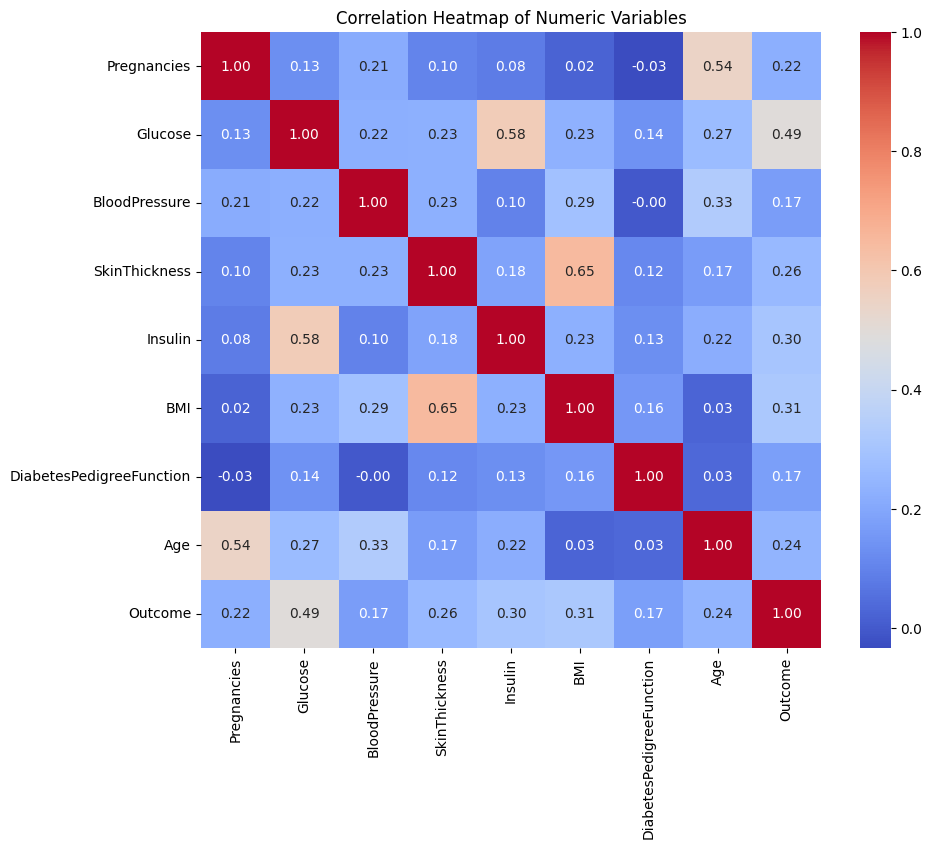

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation for numeric columns in df_clean
corr = df_clean.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()

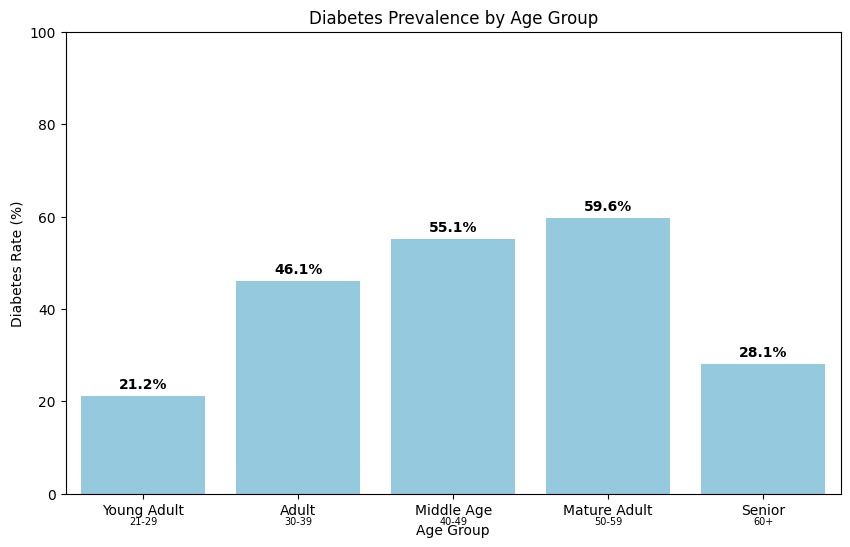

In [79]:
# Compute diabetes rate (%) by age group
diabetes_rate_age = df.groupby("age_group", observed=True)["Outcome"].mean().mul(100).round(2)

# Map age group to actual age ranges
age_ranges = {
    "Young Adult": "21-29",
    "Adult": "30-39",
    "Middle Age": "40-49",
    "Mature Adult": "50-59",
    "Senior": "60+"
}

# Create the bar chart with all bars the same color
plt.figure(figsize=(10,6))
ax = sns.barplot(x=diabetes_rate_age.index, y=diabetes_rate_age.values, color="skyblue")

# Labels and title
plt.ylabel("Diabetes Rate (%)")
plt.xlabel("Age Group")
plt.title("Diabetes Prevalence by Age Group")
plt.ylim(0, 100)

# Annotate percentage on top of each bar
for i, val in enumerate(diabetes_rate_age.values):
    ax.text(i, val + 1, f"{val:.1f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Annotate age ranges below each bar
for i, group in enumerate(diabetes_rate_age.index):
    ax.text(i, -5, age_ranges[group], ha='center', va='top', fontsize=7)

plt.show()